# Gaussian Imputation
### Author: Rajkumar Conjeevaram Mohan (rajkumarcm@yahoo.com)

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as m_normal
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

In [2]:
F = 30
N = 100

ran_mean = np.random.random([F])
ran_cov = np.eye(F,F) * 0.5

# Generate data
data = np.random.multivariate_normal(mean=ran_mean, cov=ran_cov, size=N)

# Make some feature nan so that they can be inferred
noise = np.random.binomial(1, p=0.8, size=[N, F]).astype(np.float32)
indices = noise == 0
noise[indices] = np.inf
data_m = data * noise

In [3]:
# Compute the conditional expectation
for i in range(data_m.shape[0]):
    tmp_data = data_m[i]
    vis_nodes = np.where((tmp_data < np.inf) & (tmp_data > -np.inf))[0]
    hid_nodes = np.where(np.abs(tmp_data) == np.inf)[0]
    
    hid_mean = ran_mean[hid_nodes]
    vis_mean = ran_mean[vis_nodes]
    Shh = ran_cov[hid_nodes][:, hid_nodes]
    Shv = ran_cov[hid_nodes][:, vis_nodes]
    Svv = ran_cov[vis_nodes][:, vis_nodes]
    Svv_inv = np.linalg.inv(Svv)
    est_mean = hid_mean + (Shv @ Svv_inv @ (tmp_data[vis_nodes] - vis_mean))
    data_m[i, hid_nodes] = est_mean

In [4]:
@interact(i=IntSlider(min=0, max=data.shape[0]-1, step=1, continuous_update=False))
def plot(i):
    fig, axes = plt.subplots(1, 2, figsize=(13,5))
    axes[0].set_title('Original Data')
    axes[1].set_title('Gauss Imputed Data')
    axes[0].set_xlabel('# Feature')
    axes[0].set_ylabel('Value of # Feature')
    axes[1].set_xlabel('# Feature')
    axes[1].set_ylabel('Value of # Feature')
    axes[0].stem(list(range(30)), data[i], linefmt='-', use_line_collection=True)
    axes[1].stem(list(range(30)), data_m[i], linefmt='-', use_line_collection=True)
    plt.show()

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=99), Output()), _dom_cl…

### For GitHub appearance

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_57056\2272508327.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(list(range(30)), data[i], linefmt='-', use_line_collection=True)
C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_57056\2272508327.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(list(range(30)), data_m[i], linefmt='-', use_line_collection=True)


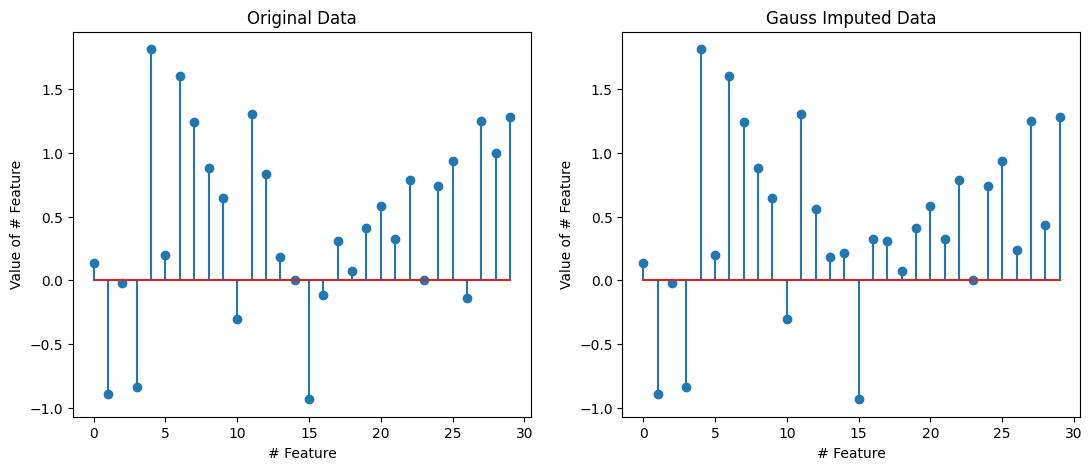

In [5]:
def plot(i=0):
    fig, axes = plt.subplots(1, 2, figsize=(13,5))
    axes[0].set_title('Original Data')
    axes[1].set_title('Gauss Imputed Data')
    axes[0].set_xlabel('# Feature')
    axes[0].set_ylabel('Value of # Feature')
    axes[1].set_xlabel('# Feature')
    axes[1].set_ylabel('Value of # Feature')
    axes[0].stem(list(range(30)), data[i], linefmt='-', use_line_collection=True)
    axes[1].stem(list(range(30)), data_m[i], linefmt='-', use_line_collection=True)
    plt.show()

plot()